In [2]:
import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFilter
from skimage import data, io, filters
from skimage import feature as ft
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from collections import Counter
import random
import Preprocess
from skimage import util
import joblib

##  Data augmentation

In [7]:
# read images (dataset2)
X = []
y = []
for j in range (0,43):
    dataset_path = "F:\\NUS SOC 2021 phase2\\Project 1_ Traffic Sign Recogniti\\Dataset_2_Train\\Train\\" + str(j)
    for i in glob.glob(dataset_path + '\\*.png', recursive=True):
        label = i.split("Dataset_2_Train\\Train\\"+ str(j)+"\\")[1][0:5]
        y.append(label)
        X.append(cv2.imread(i))       
print(len(y))
print(len(X))


# # read images (dataset1)
# dataset_path = "F:\\NUS SOC 2021 phase2\\Project 1_ Traffic Sign Recogniti\\Dataset_1\\images"
# X = []
# y = []
# for i in glob.glob(dataset_path + '\\*.png', recursive=True):   
#     label = i.split("images")[1][1:4]
#     y.append(label)
#     X.append(cv2.imread(i))
# print(len(y))
# print(len(X))

39209
39209


In [11]:
# resample
X1, y1 = Preprocess.resample(X, y)

# data augmentation
X2=X1.copy()
y2=y1.copy()
X_noisy, y_noisy = Preprocess.gaussianNoise(X1, y1)
X2+=X_noisy
y2+=y_noisy
X_affined, y_affined = Preprocess.affine(X1, y1)
X2+=X_affined
y2+=y_affined
X_rotated, y_rotated = Preprocess.rotate(X1, y1)
X2+=X_rotated
y2+=y_rotated
X_cropped, y_cropped = Preprocess.crop(X1, y1)
X2+=X_cropped
y2+=y_cropped

print("size of X after augmentation",len(X2))
print("size of y after augmentation",len(y2))

mean size of each type:  911.8372093023256
median size of each type:  600.0
size of X after resampling is:  44789
size of y after resampling is:  44789
size of X after augmentation 223945
size of y after augmentation 223945


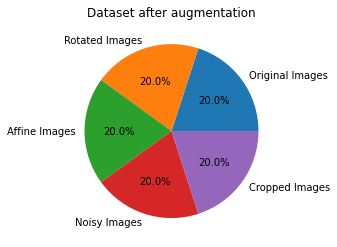

In [12]:
# draw a pie chart of current dataset(after resampling )
labels=['Original Images','Rotated Images','Affine Images','Noisy Images','Cropped Images']
R=[1,1,1,1,1]  
fig = plt.figure()
plt.pie(R,labels=labels,autopct='%1.1f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("Dataset after augmentation")
plt.show() 

## Testing

In [14]:
# some preprocess
X3, y3 = Preprocess.resize(X2, y2)
X4, y4 = Preprocess.grayscale(X3, y3)

# extracting feature
X6, y6 = Preprocess.extractFeature(X4,y4)

# split for training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size = 0.2)

# training and testing
print("SVM accuracy: ",Preprocess.SVM(X_train, y_train, X_test, y_test))
# print("Random Forest accuracy: ",Preprocess.randomForest(X_train, y_train, X_test, y_test))
# print("Gaussian Naive Bayes accuracy: ",Preprocess.gaussianNaiveBayes(X_train, y_train, X_test, y_test))
# print("k-nearest Neighbours accuracy: ",kNearestNeighbours(X_train, y_train, X_test, y_test))
# joblib.dump(clf, 'expert_dataset2.pkl')

SVM accuracy:  0.7413873942262609


['expert_dataset2.pkl']